In [1]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests
import copy
%matplotlib inline

In [2]:
model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).eval()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

In [4]:
def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

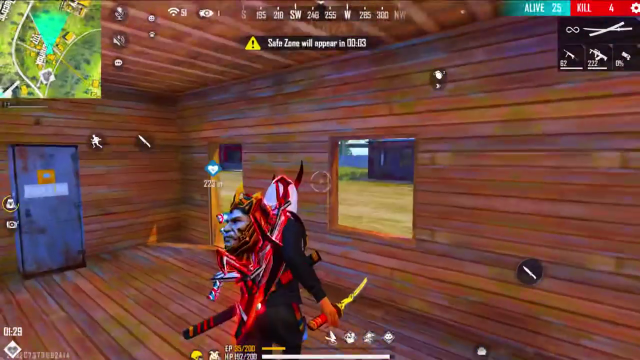

In [8]:
# url = "https://gamemusic.net/wp-content/uploads/2019/06/POPTrilogy_WW_04-1024x576-800x450.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open("/home/afc2af29-de85-4daf-a723-3fb5ba320f6b.png")
image

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[180.8000030517578, 274.8600158691406, 369.6000061035156, 342.5400085449219], [304.9599914550781, 275.2200012207031, 369.6000061035156, 333.1800231933594]], 'labels': ['the swords', 'the swords']}}


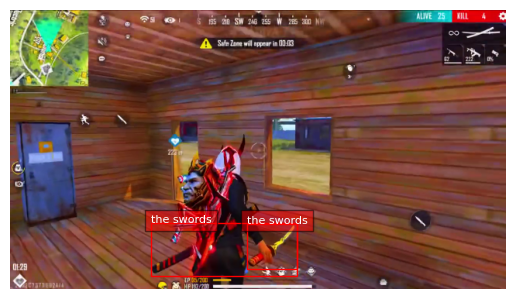

In [9]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="Locate the swords in the image")
print(results)
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[8.639999389648438, 142.3800048828125, 87.36000061035156, 278.1000061035156]], 'labels': ['the door']}}


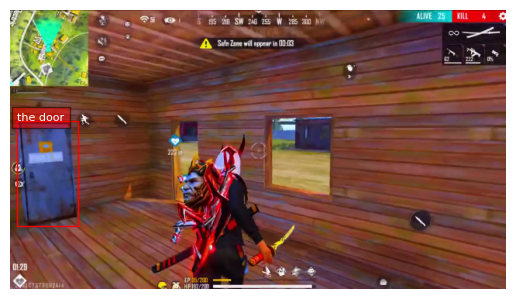

In [11]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="Locate the door in the image")
print(results)
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

In [1]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="Locate the window in the image")
print(results)
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

NameError: name 'run_example' is not defined